In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# sklearn.datasets contain mainly three type of func 
# 1.fetch_*func()(fetch_opneml) - which download the dataset 
# 2.load_*func() - which load build in datasets 
# 3.make_*func() - which generate fake dataset - this usually return (X,y) format which is ndarrays.

from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',as_frame=False)
mnist

# as you have seen this data sets are dict which is sklearn.utils.Bunch this type object. 
# this contain : DESCR : description , data : data in 2D array format , target : labels, 1D array .

/home/kartiksavaliya/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [3]:
# getting x and y from the data
x,y=mnist.data,mnist.target

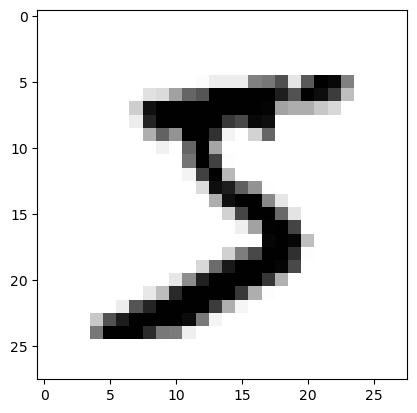

In [4]:
# seeing how the image looks like if we plot using plt

import matplotlib.pyplot as plt
def plot_digit(img_data,img_n):
    img=img_data[img_n]
    img=img.reshape(28,28)
    plt.imshow(img,cmap='binary')
    
plot_digit(x,0)

In [5]:
# train test split 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.857142858,shuffle=False)
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [6]:
# BINARY CLASSIFICATION , 
# we are try to predict if this is 5 or not 

y_train_5=(y_train=='5')
y_test_5=(y_test=='5')


# #let's select a stochestic gredient classifire and make prediction on it
from sklearn.linear_model import SGDClassifier

sgd_cl=SGDClassifier(random_state=42)
sgd_cl.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [7]:
# just try to predict a single value to see if it works or not.
first_digit=x_train[0]
# plot_digit(x_train,0)

# sgd_cl.predict([first_digit])

In [8]:
# PERFORMENCE METRICIES
#to check how accurate the model is we have use cross val score 
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_cl,x_train,y_train_5,cv=3,n_jobs=-1,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [9]:
# well seems like it did well on all folds >95% , but let's see the dummy classifier which separate in most frequent classes 

from sklearn.dummy import DummyClassifier

dummy=DummyClassifier()
dummy.fit(x_train,y_train_5)
print('using any function on dummy pred to see what it returns if false there is no true(or5) in whole array:',any(dummy.predict(x_train)))

#now let's see its accuracy 
cross_val_score(dummy,x_train,y_train_5,cv=3,scoring='accuracy')
#still gives 90% accuracy so we clearly know accuracy is not a good measure in for classification task 

using any function on dummy pred to see what it returns if false there is no true(or5) in whole array: False


array([0.90965, 0.90965, 0.90965])

In [10]:
# so we will be using confusion matrix to evalute the performance : the basic idea of confusion matrix is how many time it classify
# class A as B 

# in order to do that you need predication first we can get prediction by cross val prediction
from sklearn.model_selection import cross_val_predict

y_pred_5=cross_val_predict(sgd_cl,x_train,y_train_5,cv=3,n_jobs=-1)

In [11]:
#CONFUSION METRIX
# now let's compair it with real values using counfusion matrix 
from sklearn.metrics import confusion_matrix

#each row represent the acctual class and column represent the predicated class 
confusion_matrix(y_train_5,y_pred_5)

array([[53892,   687],
       [ 1891,  3530]])

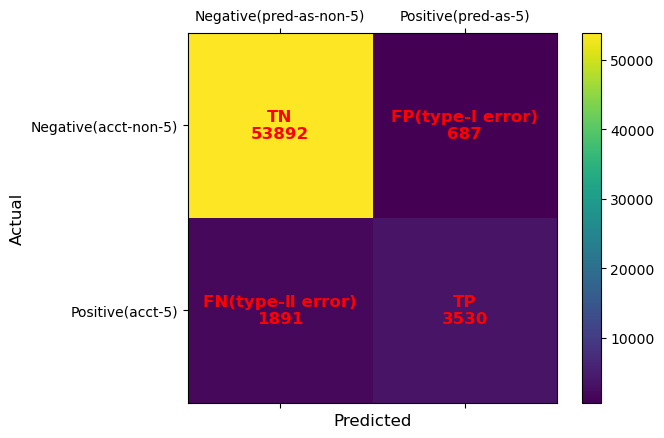

In [12]:
#let's visualize and understand some terminology here. 

# your confusion matrix
cm = confusion_matrix(y_train_5,y_pred_5)

# labels for the 4 quadrants
labels = np.array([["TN", "FP(type-Ⅰ error)"],
                   ["FN(type-Ⅱ error)", "TP"]])

fig, ax = plt.subplots()
im = ax.matshow(cm)

# loop to add both labels and values
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i,
                f"{labels[i,j]}\n{cm[i,j]}",
                ha="center", va="center",
                color="red", fontsize=12, fontweight="bold")

# add axis labels
ax.set_xlabel("Predicted", fontsize=12)
ax.set_ylabel("Actual", fontsize=12)

# customize ticks
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Negative(pred-as-non-5)", "Positive(pred-as-5)"])
ax.set_yticklabels(["Negative(acct-non-5)", "Positive(acct-5)"])

plt.colorbar(im)
plt.show()


In [23]:
# RECALL AND PRECISION
# cm gives a good info. But you want to see just the accuracy of positive predictions. -- Aka precision 
# precision = TP /(TP + FP) 
# one thing to note there no involment of FN so if model predicts all as negative except 1 (about model is sure) then 
# TP=1 , FP=0 , so precesion=100% and there is lots of FN

# here comes the recall/sensitivity/true positive rate(TPR) 
# recall= TP/(TP + FN)

from sklearn.metrics import precision_score,recall_score

print('precision : correct thismuch time (when it detect this is probility that its correct) :',precision_score(y_train_5,y_pred_5))
print('recall : detect this much time (out of all how much did the model catch) :',recall_score(y_train_5,y_pred_5))

# when you want two model to compair it's better to have one matrix which is F1score-- H.M. of precision & recall
from sklearn.metrics import f1_score

print('F1 score :',f1_score(y_train_5,y_pred_5))

precision : correct thismuch time (when it detect this is probility that its correct) : 0.8370879772350012
recall : detect this much time (out of all how much did the model catch) : 0.6511713705958311
F1 score : 0.7325171197343846


In [24]:
# in some cases like select video for child - precession must be high 
# while in check if person is theaf or not no person can passthrough if it's a thief - recall must be high 
# you can't achieve both higher at the same time - which is called precision-recall trade-off 
# you can control it by threshold and sklearn directly don't let you control the threshold but you can use decision func which return 
# so the threshold is from where two class divided you can adjust it to the right left or center.

print('using .predict :',sgd_cl.predict([first_digit]))

# getting the score for a digit.
first_digit_score=sgd_cl.decision_function([first_digit])
print('score using .decision_function :',first_digit_score)

#setting a low threshold
threshold=0
print('if threshold=0 :',first_digit_score>threshold)

# setting a high threshold 
threshold=3000
print('if threshold=3000 raising threshold decrease recall :',first_digit_score>threshold)


using .predict : [ True]
score using .decision_function : [2164.22030239]
if threshold=0 : [ True]
if threshold=3000 raising threshold decrease recall : [False]


In [136]:
# how to decide what value to choose for threshold 
# 1. generate y_scores using decision func
y_scores=cross_val_predict(sgd_cl,x_train,y_train_5,cv=3,n_jobs=-1,method='decision_function')

In [170]:
# using precision recall curve function get the values for precision and recall for each value of threshold
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(y_train_5,y_scores)

# len(y_scores)==len(y_train_5)
# prt=pd.DataFrame([precision,recall,threshold]).T
# prt.columns=['precision','recall','threshold']
# prt

#here it compute precision and recall using y_scores>=threshold and give precision and recall values.

In [71]:
threshold
precision[-1]

1.0

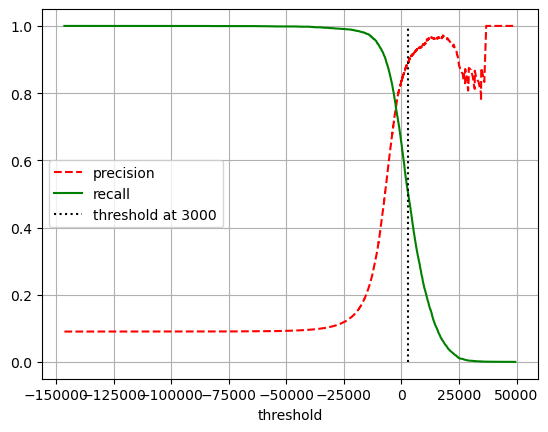

In [18]:
# plot the curve of precision and recall against threshold and see which suited your need.

plt.plot(threshold,precision[:-1],'r--',label='precision')
plt.plot(threshold,recall[:-1],'g-',label='recall')
plt.vlines(3000,0,1,'k','dotted',label='threshold at 3000')
plt.grid()
plt.xlabel('threshold')
plt.legend(loc='center left')


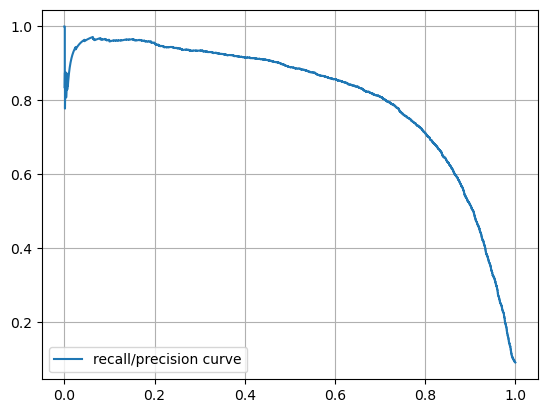

In [19]:
# another way to choose precision and recall is just draw the curve of recall vs precision

plt.plot(recall,precision,label='recall/precision curve')
plt.grid()
plt.legend(loc='lower left')

In [72]:
# to find the threshold for you desire precision you can you argmax() function which return the index where the condition just became 
# true
# print(len(precision))
precision[(precision>=0.90)]
index_where_precision_just_90=(precision>=0.9).argmax()
threshold_for_90_precision=threshold[index_where_precision_just_90]
y_pred_prec_90=y_scores>=threshold_for_90_precision


In [75]:
precision_score(y_train_5,y_pred_prec_90)
recall_score(y_train_5,y_pred_prec_90)

0.4799852425751706

In [82]:
# ROC CURVE - reciver operating characteristic curve 

# it plot true postive rate(recall) vs false positive rate - ratio of the values which is not positive but classified as positive 
# False postive rate (FPR) = FP /(FP + TN) , FPR = 1- true negative rate/specifity (TNR = TN/(FP + TN))
# so roc -- sensitivity vs 1-specifity 

from sklearn.metrics import roc_curve

fpr,tpr,threshold=roc_curve(y_train_5,y_scores)



(3908,)

In [88]:
len(pd.DataFrame(y_scores,columns=['y_scores'])['y_scores'].unique())

60000

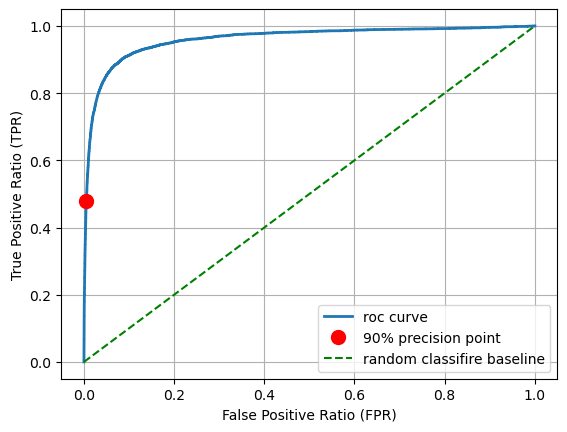

In [125]:
# ploting the roc curve. 
# now let's find the values of tpr and fpr where precision was 90% 

# np.where(threshold==threshold_for_90_precision) - that's not always work since roc curve drop the values of threshold 
index_of_threshold_where_precision_was_90 = (threshold<=threshold_for_90_precision).argmax()
fpr_at_90_precision=fpr[index_of_threshold_where_precision_was_90]
tpr_at_90_precision=tpr[index_of_threshold_where_precision_was_90]

plt.plot(fpr,tpr,label='roc curve',linewidth=2)
plt.plot(fpr_at_90_precision,tpr_at_90_precision,'ro',markersize=10,label='90% precision point')
plt.plot([0,1],[0,1],'g--',label='random classifire baseline')
plt.grid()
plt.xlabel('False Positive Ratio (FPR)')
plt.ylabel('True Positive Ratio (TPR)')
plt.legend()
plt.show()

In [127]:
# as you can see their is also a trade-off if you want high TPR(recall) it cost you high FPS
# there is a line which is random classifire line a good classifire line should be above it and on the top left corner. 

# one way to compair classifire is using area under curve func : 1=parfect classifire , 0.5= random classifire

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [135]:
#EXPLORING RANDOM FOREST CLASSIFIRE 
from sklearn.ensemble import RandomForestClassifier

random_clas=RandomForestClassifier(random_state=42)

# here for random classifier it has predict probability func instead of decision func which works fine roc curve and PR curve 
y_scores_rand=cross_val_predict(random_clas,x_train,y_train_5,cv=3,n_jobs=-1,method='predict_proba')

In [138]:
y_scores_rand_positive=y_scores_rand[:,1]
precision_rand,recall_rand,threshold_rand=precision_recall_curve(y_train_5,y_scores_rand_positive)

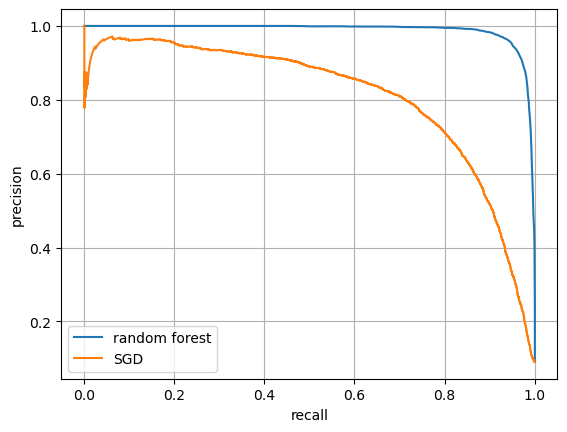

In [148]:
# let's plot both precision and recall and see which one is better 
plt.plot(recall_rand,precision_rand,label='random forest')
plt.plot(recall,precision,label='SGD')
plt.grid()
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='lower left')

In [157]:
#let's find it's f1 score 

y_pred_rand=cross_val_predict(random_clas,x_train,y_train_5,cv=3,n_jobs=-1)


SGD f1 score : 0.9242275142688446


In [159]:
print('SGD f1 score :',f1_score(y_train_5,y_pred_5))
print('random forest f1 score :',f1_score(y_train_5,y_pred_rand))

SGD f1 score : 0.7325171197343846
random forest f1 score : 0.9242275142688446


In [174]:
# now let's compair the roc auc 
print('SGD roc auc :',roc_auc_score(y_train_5,y_scores))
print('random forest roc auc :',roc_auc_score(y_train_5,y_scores_rand_positive))

SGD roc auc : 0.9604938554008616
random forest roc auc : 0.9983436731328145


In [176]:
#now let's compair precision and recall 
print(f'SGD precision : {precision_score(y_train_5,y_pred_5)} , recall : {recall_score(y_train_5,y_pred_5)}')
print(f'SGD precision : {precision_score(y_train_5,y_pred_5)} , recall : {recall_score(y_train_5,y_pred_5)}')


SGD precision : 0.8370879772350012 , recall : 0.6511713705958311
